# 00 Data load

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = load_iris()

In [3]:
features = iris['data']
feature_names = iris['feature_names']
label = iris['target']

In [4]:
df = pd.DataFrame(features, columns=feature_names)
df['target'] = label

In [8]:
# setosa, versicolor, virginica만 있는 dataframe으로 분리
setosa = df[df['target'] == 0]
versicolor = df[df['target'] == 1]
virginica = df[df['target'] == 2]

# 01 ANOVA

## 1-1 방법 1

In [11]:
setosa_sep_len = setosa['sepal length (cm)']
versicolor_sep_len = versicolor['sepal length (cm)']
virginica_sep_len = virginica['sepal length (cm)']

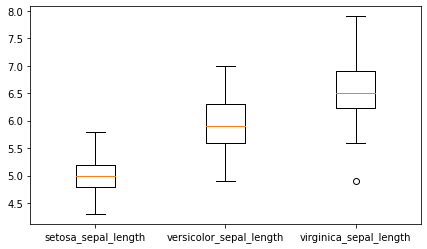

In [25]:
plt.figure(figsize=(7,4))
plt.boxplot([setosa_sep_len, versicolor_sep_len, virginica_sep_len])
plt.xticks([1,2,3],
           ['setosa_sepal_length',
            'versicolor_sepal_length',
            'virginica_sepal_length'])
plt.show()

In [26]:
df.head(3) # 무조건 새로운 거 하기 전에 dataframe 열어보는 습관 중요~

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [30]:
df.iloc[:, 0] # sepal length only

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64

In [31]:
df.iloc[:, -1] #  target only

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [35]:
newData = pd.concat([df.iloc[:, 0], df.iloc[:, -1]], axis=1)

In [38]:
newData = np.array(newData)

In [43]:
setosa_array = newData[newData[:, 1] == 0]
versicolor_array = newData[newData[:, 1] == 1]
virginica_array = newData[newData[:, 1] == 2]

In [45]:
setosa_array[:, 0] # sepal length만 얻는 방법!

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. ])

In [46]:
from scipy import stats

In [47]:
F_statistics, p_val = stats.f_oneway(setosa_array[:, 0],
                                     versicolor_array[:, 0],
                                     virginica_array[:, 0])

In [48]:
print('F statistics is:', F_statistics, 'p-value is:', p_val)

F statistics is: 119.26450218450468 p-value is: 1.669669190769383e-31


p-value가 0.05보다 작기 때문에 H0을 reject한다.

H0는 'setosa, versicolor, virginica의 sepal length의 평균이 모두 같다' 였다.

H0을 reject를 하기 때문에 setosa, versicolor, virginica의 sepal length의 평균은 다르다고 할 수 있다.

## 1-2 방법 2

In [49]:
!pip install statsmodels

You should consider upgrading via the 'c:\users\stell\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [50]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [51]:
## column 이름 변경 (띄어쓰기 없도록)
df = df.rename(columns={'sepal length (cm)' : 'sepal_length'})

In [52]:
df.head(1)

,sepal_length,sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0


In [53]:
iris_result = ols("sepal_length ~ target", data=df).fit()

In [54]:
sm.stats.anova_lm(iris_result, type=2)

,df,sum_sq,mean_sq,F,PR(>F)
target,1.0,62.568100,62.568100,233.838996,2.890478e-32
Residual,148.0,39.600233,0.267569,NaN,NaN


# 02 Linear Regression

In [55]:
data = pd.read_csv('train.csv')

In [57]:
data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [58]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 2-1 simple linear regression

### (1) statsmodels 이용

In [60]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm # 앞에서 했지만 나중에 할 때 헷갈리지 말라고 또 넣었어요!

In [62]:
# response variable (종속변수!)
y = data.SalePrice

In [63]:
# predictor variable (독립변수!)
x = data.YearBuilt

In [64]:
# add constant to predictor variable
x = sm.add_constant(x) # y = ax+b. 여기서 b 때문에 하는거예요!
x

,const,YearBuilt
0,1.0,2003
1,1.0,1976
2,1.0,2001
3,1.0,1915
4,1.0,2000
...,...,...
1455,1.0,1999
1456,1.0,1978
1457,1.0,1941
1458,1.0,1950


In [65]:
model = sm.OLS(y, x).fit()

In [66]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     548.7
Date:                Sun, 11 Jun 2023   Prob (F-statistic):          2.99e-103
Time:                        14:23:30   Log-Likelihood:                -18311.
No. Observations:                1460   AIC:                         3.663e+04
Df Residuals:                    1458   BIC:                         3.664e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.53e+06   1.16e+05    -21.858      0.0

### (2) 값 예측

In [67]:
y = data.SalePrice
x = data.YearBuilt

In [71]:
x.values.reshape(-1, 1)

array([[2003],
       [1976],
       [2001],
       ...,
       [1941],
       [1950],
       [1965]], dtype=int64)

In [72]:
model = LinearRegression()
model.fit(x.values.reshape(-1, 1), y)

LinearRegression()

In [74]:
model.predict([[2023]])[0]

252072.27990397625

In [75]:
print('2023년 건축된 건물의 가격:', model.predict([[2023]])[0])

2023년 건축된 건물의 가격: 252072.27990397625
